In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (2).csv


In [ ]:
# Get the data
log = pd.read_csv("Login.csv")


In [ ]:
# Twitter Api Credentials
consumerKey = "ADD YOURS CONSUMER KEY"
consumerSecret ="ADD YOURS CONSUMER SECRET"
accessToken = "ADD YOURS ACCESS TOKEN"
accessTokenSecret =  "ADD YOURS ACCESS TOKEN SECRET"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True) 

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="realDonaldTrump", count = 100, lang ="en", tweet_mode="extended")

In [ ]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Show the 5 recent tweets:

1) https://t.co/Xdf1LYKu2i

2) RT @WhiteHouse: "To go forward, we must seek cooperation—not confrontation. We must build upon our heritage—not tear it down." https://t.co…

3) RT @WhiteHouse: "In order to make real progress on public safety, we have to break old patterns of failure.

Many of the same politicians n…

4) RT @WhiteHouse: President @realDonaldTrump stands against radical efforts to defund police departments. https://t.co/JHjzrFuqN3

5) RT @WhiteHouse: President @realDonaldTrump announces "historic action to deliver a future of safety and security for Americans of every rac…



In [ ]:
#create dataframe 
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#show the first 5 data frame
df.head()

,Tweets
0,https://t.co/Xdf1LYKu2i
1,"RT @WhiteHouse: ""To go forward, we must seek c..."
2,"RT @WhiteHouse: ""In order to make real progres..."
3,RT @WhiteHouse: President @realDonaldTrump sta...
4,RT @WhiteHouse: President @realDonaldTrump ann...


In [ ]:
#clean data

#function for cleaning
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #removed @
  text = re.sub(r'#','',text) #Removing #
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  return text


In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanText)

In [ ]:
df

,Tweets
0,
1,": ""To go forward, we must seek cooperation—not..."
2,": ""In order to make real progress on public sa..."
3,: President stands against radical efforts to...
4,": President announces ""historic action to del..."
...,...
95,: CLUELESS. 100% out of touch with reality.
96,: This is a critical milestone. Two therapeuti...
97,: It happened 'following a peaceful demonstrat...
98,: Another Columbus statue bites the dust.


In [ ]:
#create function to get subjectivity
def get_sub(text):
  return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

#create two new colums
df['Subjectivity'] = df['Tweets'].apply(get_sub)  
df['Polarity'] = df['Tweets'].apply(get_polar)  


In [ ]:
#show ne dataframe with two columns
df

,Tweets,Subjectivity,Polarity
0,,0.000000,0.000000
1,": ""To go forward, we must seek cooperation—not...",0.288889,-0.155556
2,": ""In order to make real progress on public sa...",0.248611,0.080556
3,: President stands against radical efforts to...,0.000000,0.000000
4,": President announces ""historic action to del...",0.075000,0.033333
...,...,...,...
95,: CLUELESS. 100% out of touch with reality.,0.000000,0.000000
96,: This is a critical milestone. Two therapeuti...,0.650000,0.250000
97,: It happened 'following a peaceful demonstrat...,0.300000,0.125000
98,: Another Columbus statue bites the dust.,0.000000,0.000000


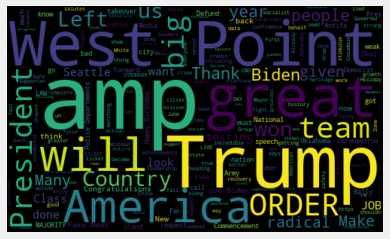

In [ ]:
#Plot Wordcloud
allwords = ''.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()


In [ ]:
#create function for negative and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

  

In [ ]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,,0.000000,0.000000,Neutral
1,": ""To go forward, we must seek cooperation—not...",0.288889,-0.155556,Negative
2,": ""In order to make real progress on public sa...",0.248611,0.080556,Positive
3,: President stands against radical efforts to...,0.000000,0.000000,Neutral
4,": President announces ""historic action to del...",0.075000,0.033333,Positive
...,...,...,...,...
95,: CLUELESS. 100% out of touch with reality.,0.000000,0.000000,Neutral
96,: This is a critical milestone. Two therapeuti...,0.650000,0.250000,Positive
97,: It happened 'following a peaceful demonstrat...,0.300000,0.125000,Positive
98,: Another Columbus statue bites the dust.,0.000000,0.000000,Neutral


In [ ]:
#Print Positive tweet
j = 1
sortedDf = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
      print(str(j) + ')'+sortedDf['Tweets'][i])
      print()
      j=j+1


In [ ]:
#Print Negative tweets
j = 1
sortedDf = df.sort_values(by = ['Polarity'], ascending='False')
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Negative'):
      print(str(j) + ')'+sortedDf['Tweets'][i])
      print()
      j=j+1

1): "To go forward, we must seek cooperation—not confrontation. We must build upon our heritage—not tear it down." 

2)The Far Left Fake News Media, which had no Covid problem with the Rioters &amp; Looters destroying Democrat run cities, is trying to Covid Shame us on our big Rallies. Won’t work!

3)I’ve done more in less than 4 years than Biden’s done in more than 40 years, including for Black America. Biden has been a part of every failed decision for decades. Bad Trade Deals, Endless Wars, you name it, he has shown a complete lack of leadership. He’s weak &amp; shot!!!

4)Many Democrats want to Defund and Abolish Police Departments. HOW CRAZY!

5): if you want to see General Flynn sue the FBI and it’s corrupt actors for all they’re worth and at the same time brin…

6)Interesting how ANTIFA and other Far Left militant groups can take over a city without barely a wimpier from soft Do Nothing Democrat leadership,  yet these same weak leaders become RADICAL when it comes to shutting do

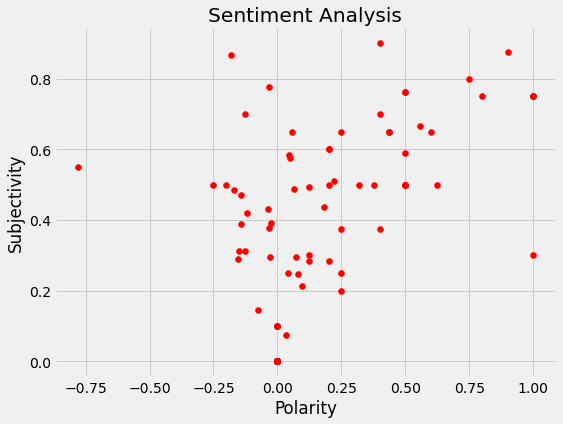

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color = 'Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

46.0

In [ ]:
#Percentage of Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

18.0

In [ ]:
#Percentage of Negative tweets
nttweets = df[df.Analysis == 'Neutral']
nttweets = nttweets['Tweets']
round((nttweets.shape[0]/df.shape[0])*100,1)

36.0

In [ ]:
#Value Counts
df['Analysis'].value_counts()


Positive    46
Neutral     36
Negative    18
Name: Analysis, dtype: int64

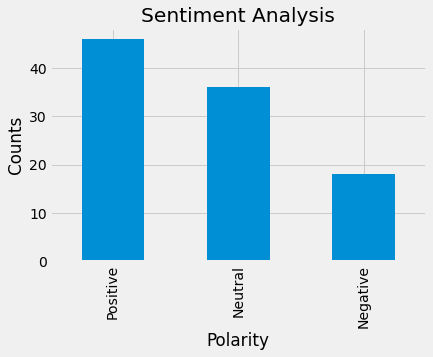

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()